In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import scipy.optimize as so
import os

In [20]:

# Calculating the function with consideration for I < 2 and I < 1
V = np.where(i < 30.1, 0, R * np.sqrt(I**2 - i**2))
V1 = np.where(i < 23, 0, R * np.sqrt(I**2 - i**2))


C:\Users\n1cos\AppData\Local\Temp\ipykernel_22084\2163342885.py:5: RuntimeWarning: invalid value encountered in sqrt
  V = np.where(I < 30.1, 0, R * np.sqrt(I**2 - 30.1**2))
C:\Users\n1cos\AppData\Local\Temp\ipykernel_22084\2163342885.py:6: RuntimeWarning: invalid value encountered in sqrt
  V1 = np.where(I < 23, 0, R * np.sqrt(I**2 - 23**2))


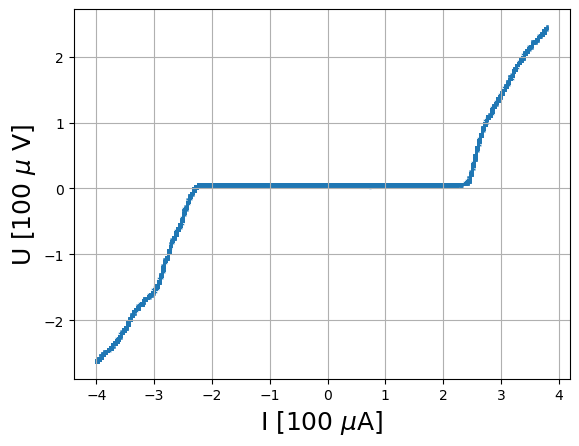

In [19]:
fd=(r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\Temp_Strom\I\C164,K00000.txt")
df = pd.read_csv(fd)
read_data = df.iloc[12:, 0].values.astype(np.float32)
dat = read_data
fd1=(r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\Temp_Strom\U\C264,K00000.txt")
df1 = pd.read_csv(fd1)
read_data1= df1.iloc[12:, 0].values.astype(np.float32)
y=read_data1

plt.scatter(dat, y,marker="x", s=0.1)
plt.xlabel(r'I [100 $\mu$A]', fontsize=18)
plt.ylabel(r'U [100 $\mu$ V]',fontsize=18)
plt.grid(True)
plt.show() 

C:\Users\n1cos\AppData\Local\Temp\ipykernel_22084\1154607510.py:20: RuntimeWarning: invalid value encountered in sqrt
  return np.where((-i < I)&(I < i), 0, R *np.sign(I)* np.sqrt( I**2 - i**2))


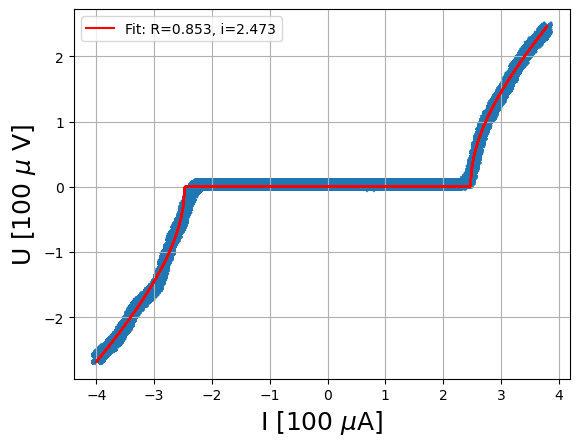

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# File paths
fd = r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\Temp_Strom\I\C164,K00000.txt"
fd1 = r"C:\Users\n1cos\OneDrive\Documentos\Semester 6\Bachelor Thesis\Temp_Strom\U\C264,K00000.txt"

# Read data from first file
df = pd.read_csv(fd)
dat = df.iloc[12:, 0].values.astype(np.float32)

# Read data from second file
df1 = pd.read_csv(fd1)
y = df1.iloc[12:, 0].values.astype(np.float32)

# Define the function
def func(I, R, i):
    return np.where((-i < I)&(I < i), 0, R *np.sign(I)* np.sqrt( I**2 - i**2))

           

# Initial guess for parameters
initial_guess = [2, 2.3]  # You need to provide initial values for R and i

# Fit the function to the data
params, covariance = curve_fit(func, dat, y, p0=initial_guess)

# Extracting fitted parameters
R_fit, i_fit = params

# Plot
plt.scatter(dat, y, marker="x")
plt.plot(dat, func(dat, R_fit, i_fit), color='red', label='Fit: R=%5.3f, i=%5.3f' % (R_fit, i_fit))
plt.xlabel(r'I [100 $\mu$A]', fontsize=18)
plt.ylabel(r'U [100 $\mu$ V]',fontsize=18)
plt.grid(True)
plt.grid(True)
plt.legend()
plt.show()


In [34]:
def func(I, R, i):
    return np.where((0 < I) &(I < i), 0, R * np.sqrt(I**2 - i**2))

def func2(I, R, i):
    return np.where((-i < I) & (I < 0), 0, R * np.sqrt(I**2 - i**2))

# Initial guess for parameters
initial_guess = [2, 2.3]  # You need to provide initial values for R and i

# Fit the function to the data
params, covariance = curve_fit(func, dat, y, p0=initial_guess)
params2, covariance2 = curve_fit(func2, dat, y, p0=initial_guess)

# Extracting fitted parameters
R_fit, i_fit = params
R_fit2, i_fit2 = params2

# Plot
plt.scatter(dat, y, marker="x", s=1)
plt.plot(dat, func(dat, R_fit, i_fit), color='red', label='Fit: R=%5.3f, i=%5.3f' % (R_fit, i_fit))
plt.plot(dat, func2(dat, R_fit2, i_fit2), color='blue', label='Fit 2: R=%5.3f, i=%5.3f' % (R_fit2, i_fit2))
plt.grid(True)
plt.legend()
plt.show()


C:\Users\n1cos\AppData\Local\Temp\ipykernel_22084\830542846.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.where((0 < I) &(I < i), 0, R * np.sqrt(I**2 - i**2))


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.